In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

### Binarization of image captured with uneven illumination.

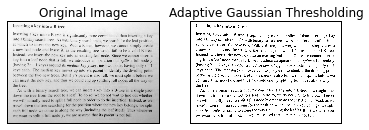

In [31]:
# Load image in grayscale
img = cv2.imread('testcases/cam1.jpg',0)
img = cv2.medianBlur(img,5)

# Perform Adaptive Gaussian Thresholding
th = cv2.adaptiveThreshold(img,255,\
                           cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                           cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Adaptive Gaussian Thresholding']
images = [img,th]

for i in xrange(2):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
# Save binarized image
cv2.imwrite('binthreshresult.png',th)

### Perform dilation to obtain text lines for line detection.

In [70]:
# Structuring element designed to create blocks of 
# text lines for calculation of skew angle.
kernel = np.ones((3,30),np.uint8)

In [71]:
img_inv = cv2.bitwise_not(th)

In [72]:
dilation = cv2.dilate(img_inv, kernel, iterations = 1)

In [73]:
cv2.imwrite('morphresult.png',dilation)

True